<a href="https://colab.research.google.com/github/plaban1981/NLP-with-Python/blob/master/multi_text_classification_assignment_BirlaSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task : 

* Given input data with clean text after stopwords removal and after pre processing

* Apply some multi label classification and get good accuracy

In [1]:
from google.colab import files
files.upload()

Saving input_data (1).xlsx to input_data (1).xlsx


{'input_data (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00{\x92\xc8!z\x01\x00\x00\x81\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

## Import Basic Data Science Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data into a dataframe

In [3]:
df = pd.read_excel("/content/input_data (1).xlsx")
df.head()

,Unnamed: 0,Class,text_clean
0,0,1,side effect domperidone seen study included pa...
1,1,1,two patient stopped domperidone side effect pa...
2,2,1,treatment side effect reported xxxx patient co...
3,3,1,patient side effect typically occurred early c...
4,4,1,none side effect due significant cardiac arrhy...


## Removing the first column as it is not necessary

In [6]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Class,text_clean
1,1,two patient stopped domperidone side effect pa...
2,1,treatment side effect reported xxxx patient co...
3,1,patient side effect typically occurred early c...
4,1,none side effect due significant cardiac arrhy...
5,1,difference adverse event seen among group


In [8]:
df.shape

(1481, 2)

## Check for missing values

In [36]:
df.isnull().sum()[df.isnull().sum() > 0]

text_clean    49
dtype: int64

In [40]:
df[df['text_clean'].isnull()]['Class'].unique()

array([1, 3])

* the clean_text column has some 49 rows as null and classes associated are 1 and 3

## Dropping rows with text_clean column having null values

In [41]:
df_new = df.dropna()

In [42]:
df_new.shape

(1432, 2)

## Class Count without dropping null values

In [47]:
df.Class.value_counts()

3    494
2    494
1    493
Name: Class, dtype: int64

## Class Count post dropping null values

In [48]:
df_new.Class.value_counts()

2    494
1    491
3    447
Name: Class, dtype: int64

## Visualize Labels

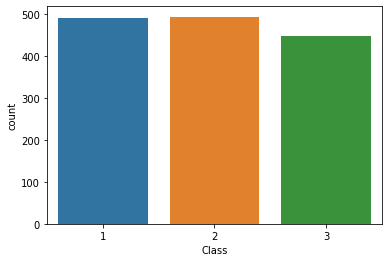

In [43]:
sns.countplot(x='Class',data=df_new)
plt.show()

* Data is balanced since all labels have equal proportion of data

## Number of texts associated with each class

In [45]:
counts = []
category = []
for k,v in df_new.Class.value_counts().to_dict().items():
  category.append(k)
  counts.append(v)
df_stats = pd.DataFrame({'category' :category, 'number_of_comments':counts})
df_stats

,category,number_of_comments
0,2,494
1,1,491
2,3,447


Text(0.5, 0, 'category')

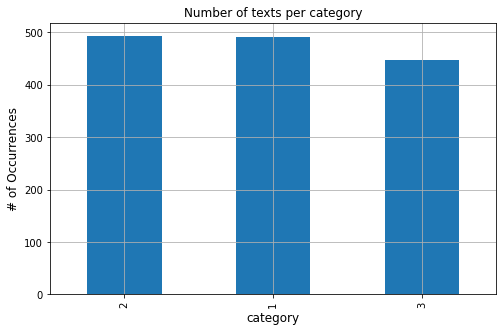

In [46]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of texts per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In [57]:
df_dummies = pd.get_dummies(df_new['Class'])

In [59]:
df_dummies.head()

,1,2,3
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [60]:
final_df = pd.concat([df_new,df_dummies],axis=1)
final_df.head()

,Class,text_clean,1,2,3
1,1,two patient stopped domperidone side effect pa...,1,0,0
2,1,treatment side effect reported xxxx patient co...,1,0,0
3,1,patient side effect typically occurred early c...,1,0,0
4,1,none side effect due significant cardiac arrhy...,1,0,0
5,1,difference adverse event seen among group,1,0,0


In [61]:
final_df = final_df.drop('Class',axis=1)
final_df.head()

,text_clean,1,2,3
1,two patient stopped domperidone side effect pa...,1,0,0
2,treatment side effect reported xxxx patient co...,1,0,0
3,patient side effect typically occurred early c...,1,0,0
4,none side effect due significant cardiac arrhy...,1,0,0
5,difference adverse event seen among group,1,0,0


## Split the data to train and test sets:

In [63]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(final_df, random_state=42, test_size=0.20, shuffle=True)
X_train = train.text_clean
X_test = test.text_clean
print(X_train.shape)
print(X_test.shape)

(1145,)
(287,)


## Training Classifier Model

* Making use of scikitlearn pipeline utility
* Training on the below classifiers
    - OneVsRest multi-label strategy
    - Naive Bayes
    - LinearSVC
    - LogisticRegression

## OneVsRest multi-label strategy
The Multi-label algorithm accepts a binary mask over multiple labels. The result for each prediction will be an array of 0s and 1s marking which class labels apply to each row input sample.


## Import Required Machine Learning Libraries

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

#
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
categories = df_new.Class.unique().tolist()
categories

[1, 2, 3]

## # Define a pipeline combining a text feature extractor with multi lable classifier

In [53]:
## Naive Bayes Pipeline
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])


## Processing the Naive Bayes pipeline

In [65]:
Naive_bayes_score = {}
for category in categories:
    print(f'Processing category : {category}')
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print(f'Test accuracy for {category} is {accuracy_score(test[category], prediction)}')
    Naive_bayes_score[category] = accuracy_score(test[category], prediction)

Processing category : 1
Test accuracy for 1 is 0.8013937282229965
Processing category : 2
Test accuracy for 2 is 0.8013937282229965
Processing category : 3
Test accuracy for 3 is 0.7073170731707317


## Definining LinearSVC Pipeline

In [66]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=-1)),
            ])

## Processing the LinearSVC pipeline

In [68]:
LinearSVC_score = {}
for category in categories:
    print(f'Processing category : {category}')
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print(f'Test accuracy for {category} is {accuracy_score(test[category], prediction)}')
    LinearSVC_score[category] = accuracy_score(test[category], prediction)

Processing category : 1
Test accuracy for 1 is 0.8048780487804879
Processing category : 2
Test accuracy for 2 is 0.818815331010453
Processing category : 3
Test accuracy for 3 is 0.7386759581881533


## Defining the LogisticRegression Pipeline

In [69]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

## Processing the Logistic Regression Pipeline

In [70]:
lr_score = {}
for category in categories:
    print(f'Processing category : {category}')
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print(f'Test accuracy for {category} is {accuracy_score(test[category], prediction)}')
    lr_score[category] = accuracy_score(test[category], prediction)

Processing category : 1
Test accuracy for 1 is 0.8048780487804879
Processing category : 2
Test accuracy for 2 is 0.7979094076655052
Processing category : 3
Test accuracy for 3 is 0.735191637630662


## Defining Decision Tree Pipeline

In [73]:
dt_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(DecisionTreeClassifier(random_state=42), n_jobs=1)),
            ])

In [74]:
dt_score = {}
for category in categories:
    print(f'Processing category : {category}')
    # train the model using X_dtm & y
    dt_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = dt_pipeline.predict(X_test)
    print(f'Test accuracy for {category} is {accuracy_score(test[category], prediction)}')
    dt_score[category] = accuracy_score(test[category], prediction)

Processing category : 1
Test accuracy for 1 is 0.7386759581881533
Processing category : 2
Test accuracy for 2 is 0.7839721254355401
Processing category : 3
Test accuracy for 3 is 0.6341463414634146


## Defining a RandomForest Classifier Pipeline

In [215]:
rf_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(random_state=42), n_jobs=1)),
            ])

In [77]:
rf_score = {}
for category in categories:
    print(f'Processing category : {category}')
    # train the model using X_dtm & y
    rf_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = rf_pipeline.predict(X_test)
    print(f'Test accuracy for {category} is {accuracy_score(test[category], prediction)}')
    rf_score[category] = accuracy_score(test[category], prediction)

Processing category : 1
Test accuracy for 1 is 0.8257839721254355
Processing category : 2
Test accuracy for 2 is 0.8153310104529616
Processing category : 3
Test accuracy for 3 is 0.7177700348432056


## Comparing Models

In [78]:
model_scores = {'RandomForestClassifier':rf_score,
                'DecisionTreeClassifier':dt_score,
                'LogisticRegression':lr_score,
                'LinearSVC':LinearSVC_score,
                'Naive_bayes':Naive_bayes_score
                }

In [80]:
name =[]
label1 = []
label2 = []
label3 = []
for k,v in model_scores.items():
  name.append(k)
  label1.append(v[1])
  label2.append(v[2])
  label3.append(v[3])

In [81]:
name

['RandomForestClassifier',
 'DecisionTreeClassifier',
 'LogisticRegression',
 'LinearSVC',
 'Naive_bayes']

In [83]:
model_scores_df = pd.DataFrame({"Model_name":name,
                                "Class 1 scores":label1,
                                "Class 2 scores":label2,
                                "Class 3 scores":label3,
                                })
model_scores_df

,Model_name,Class 1 scores,Class 2 scores,Class 3 scores
0,RandomForestClassifier,0.825784,0.815331,0.717770
1,DecisionTreeClassifier,0.738676,0.783972,0.634146
2,LogisticRegression,0.804878,0.797909,0.735192
3,LinearSVC,0.804878,0.818815,0.738676
4,Naive_bayes,0.801394,0.801394,0.707317


* Comparing the accuracy scores for all base models we can find that RandomForesClassifier gives the best performance

## Hyperparameter Tuning RandomForestClassifier

In [124]:
df_new.head()

,Class,text_clean
1,1,two patient stopped domperidone side effect pa...
2,1,treatment side effect reported xxxx patient co...
3,1,patient side effect typically occurred early c...
4,1,none side effect due significant cardiac arrhy...
5,1,difference adverse event seen among group


In [127]:
def rep_labels(x):
  x -=1
  return x

In [128]:
df_new['Class'] = df_new['Class'].map(rep_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
df_new.head()

,Class,text_clean
1,0,two patient stopped domperidone side effect pa...
2,0,treatment side effect reported xxxx patient co...
3,0,patient side effect typically occurred early c...
4,0,none side effect due significant cardiac arrhy...
5,0,difference adverse event seen among group


## Defining a RandomForestClassifier Pipeline with out One Versus Rest startegy

In [97]:
rf_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('rf', RandomForestClassifier()),
            ])

## Train Test Split

In [132]:
df_new.head()

,Class,text_clean
1,0,two patient stopped domperidone side effect pa...
2,0,treatment side effect reported xxxx patient co...
3,0,patient side effect typically occurred early c...
4,0,none side effect due significant cardiac arrhy...
5,0,difference adverse event seen among group


In [169]:
X = df_new['text_clean']
y = df_new['Class']

In [170]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.20, stratify =y,shuffle=True)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1145,) (1145,)
(287,) (287,)


In [172]:
from sklearn.model_selection import GridSearchCV
params = {
    'rf__max_depth': [2,4, 5],
    'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__n_estimators': [100, 200, 300]
}

In [193]:
rf_gs = GridSearchCV(rf_pipeline,param_grid=params,n_jobs=-1, verbose=1, cv=3, scoring='accuracy')
rf_gs.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words={'a',
                                                                    'about',
                                                                    'above',
                                                                    'after',
                                                                    'again',
                                                                    'against',
                                                                    'ain',
                                                                    'all', 'am',
                                                                    'an', 'and',
                                                                    'any',
                                                                    'are',
                                                                    'aren',
         

## Obtain the best Parameters obtained from GridDearchCV

In [194]:
rf_gs.best_params_

{'rf__max_depth': 4,
 'rf__max_features': 3,
 'rf__min_samples_leaf': 3,
 'rf__n_estimators': 300}

## Choosing the best models giving a good onevsrest scores

1. RandomForestClassifier


In [205]:
rf_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RF, n_jobs=1)),
            ])

In [216]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
                                             'couldn', "couldn't", ...})),
                ('clf',
                 OneVsRestClassifier(estimator=RandomForestClassifier(random_state=42),
                                     n_jobs=1))])

In [217]:
predictions=rf_pipeline.predict(X_test)

##Evaluate the predictions made by the Model

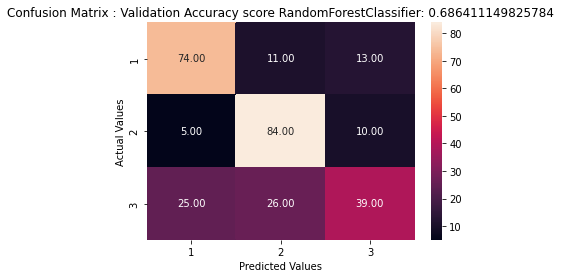

In [218]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,plot_roc_curve
cf = confusion_matrix(y_test,predictions)
accuracy = accuracy_score(y_test,predictions)
sns.heatmap(cf,annot=True,fmt=".2f",xticklabels=[1,2,3],yticklabels=[1,2,3])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title(f'Confusion Matrix : Validation Accuracy score RandomForestClassifier: {accuracy}')
plt.show()

##Classification Report

In [226]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        98
           1       0.69      0.85      0.76        99
           2       0.63      0.43      0.51        90

    accuracy                           0.69       287
   macro avg       0.68      0.68      0.67       287
weighted avg       0.68      0.69      0.67       287



* **note** : class 0 corresponds to class 1, class 1 corresponds toclass 2 and class 2 corresponds to class 3

In [219]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_prob = rf_pipeline.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.868248 (macro),
0.869556 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.869821 (macro),
0.871989 (weighted by prevalence)
